In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

In [5]:
df = pd.read_csv("C:/Users/Owner/depression-prediction/data/reddit_depression_dataset.csv", nrows=10000)
print(df.head())

   Unnamed: 0     subreddit  \
0       47951  DeepThoughts   
1       47952  DeepThoughts   
2       47957  DeepThoughts   
3       47959  DeepThoughts   
4       47960  DeepThoughts   

                                               title  \
0                             Deep thoughts underdog   
1  I like this sub, there's only two posts yet I ...   
2                                           Rebirth!   
3  "I want to be like water. I want to slip throu...   
4                                          Who am I?   

                                                body  upvotes  created_utc  \
0  Only when we start considering ourselves, the ...        4   1405308909   
1  Anyway: Human Morality is a joke so long as th...        4   1410568279   
2  Hello. \nI am the new guy in charge here (Besi...        6   1416457918   
3                                                NaN       25   1416512285   
4  You could take any one cell in my body and kil...        5   1416515812   

   num_

In [7]:
print("First 5 rows:")
print(df.head())
print("\nDataset info:")
print(df.info())
print("\nBasic stats for numeric columns:")
print(df.describe())

First 5 rows:
   Unnamed: 0     subreddit  \
0       47951  DeepThoughts   
1       47952  DeepThoughts   
2       47957  DeepThoughts   
3       47959  DeepThoughts   
4       47960  DeepThoughts   

                                               title  \
0                             Deep thoughts underdog   
1  I like this sub, there's only two posts yet I ...   
2                                           Rebirth!   
3  "I want to be like water. I want to slip throu...   
4                                          Who am I?   

                                                body  upvotes  created_utc  \
0  Only when we start considering ourselves, the ...        4   1405308909   
1  Anyway: Human Morality is a joke so long as th...        4   1410568279   
2  Hello. \nI am the new guy in charge here (Besi...        6   1416457918   
3                                                NaN       25   1416512285   
4  You could take any one cell in my body and kil...        5   14165158

In [10]:
print("\nMissing values per column:")
print(df.isnull().sum())


Missing values per column:
Unnamed: 0         0
subreddit          0
title              0
body            2516
upvotes            0
created_utc        0
num_comments     642
label              0
dtype: int64



Class distribution:
label
0    10000
Name: count, dtype: int64


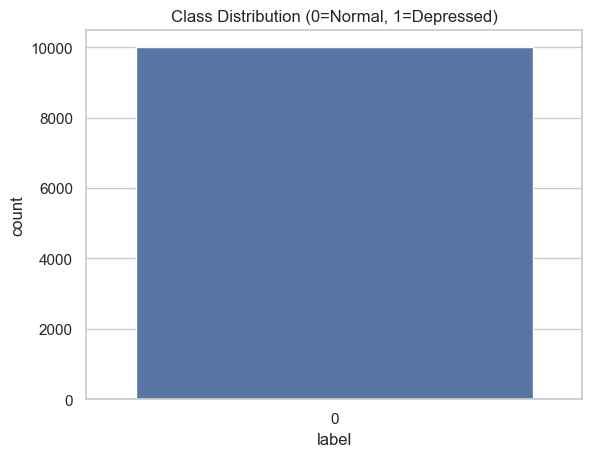

In [11]:
print("\nClass distribution:")
print(df['label'].value_counts())
sns.countplot(x='label', data=df)
plt.title("Class Distribution (0=Normal, 1=Depressed)")
plt.show()

Observation: The dataset is imbalanced. We will address this before training.


In [13]:
# Safely compute text length and diagnose non-string values
print("Detecting non-string values in 'body' column...")
# Count non-string / missing values
non_string_mask = ~df['body'].apply(lambda x: isinstance(x, str))
print("Non-string (or missing) count:", non_string_mask.sum())

if non_string_mask.any():
    print("Type distribution for non-string values:")
    print(df.loc[non_string_mask, 'body'].apply(lambda x: type(x)).value_counts())
    print("\nExamples of non-string values (first 10):")
    print(df.loc[non_string_mask, 'body'].head(10).to_list())

# Create text_length robustly: treat missing as empty string and convert everything to str
# .str.len() will handle strings efficiently and returns integers (NaN preserved if you prefer)
df['text_length'] = df['body'].fillna('').astype(str).str.len()

print("\nText length stats:")
print(df['text_length'].describe())

Detecting non-string values in 'body' column...
Non-string (or missing) count: 2516
Type distribution for non-string values:
body
<class 'float'>    2516
Name: count, dtype: int64

Examples of non-string values (first 10):
[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]

Text length stats:
count    10000.000000
mean       593.478200
std       1008.795549
min          0.000000
25%          0.000000
50%        267.000000
75%        746.000000
max      16008.000000
Name: text_length, dtype: float64


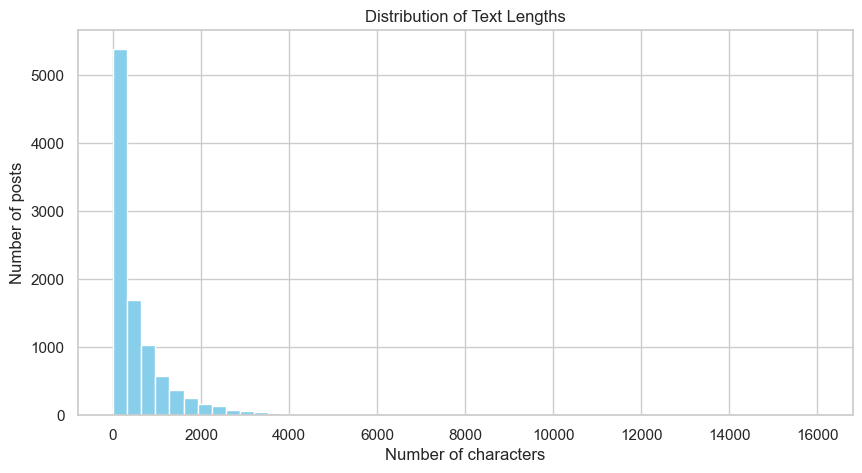

In [14]:
plt.figure(figsize=(10,5))
plt.hist(df['text_length'], bins=50, color='skyblue')
plt.title("Distribution of Text Lengths")
plt.xlabel("Number of characters")
plt.ylabel("Number of posts")
plt.show()

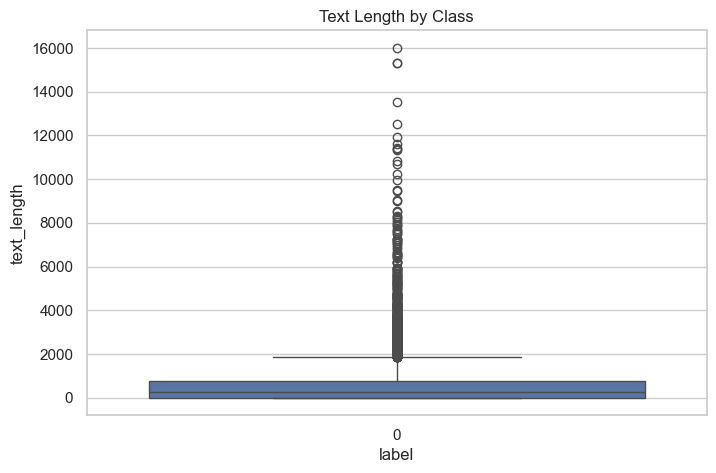

In [15]:
plt.figure(figsize=(8,5))
sns.boxplot(x='label', y='text_length', data=df)
plt.title("Text Length by Class")
plt.show()

In [16]:
duplicates = df.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicates}")


Number of duplicate rows: 0


In [17]:
short_posts = (df['text_length'] < 20).sum()
print(f"Number of very short posts (<20 chars): {short_posts}")

Number of very short posts (<20 chars): 2664
